<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, hsla(207, 100%, 12%, 1.00), #0028d8ff); 
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
        TITANIC & IRIS DATA EXPLORATION
    </h1>
</div>


<h3 style="color:#7196E5">1. Import The Required Libraries</h3>

In [1]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

<h2 style="color:#7196E5; display:inline;">
  <strong>2.Load the fixed Heart Disease dataset </strong>
</h2>
<h3 style="color:#7196E5; display:inline; margin-left:8px;">
(url = "https://github.com/asthasharma98/Heart-Disease-Prediction-Deployment/blob/master/heart_cleveland_upload.csv")
</h3>


In [2]:
heart = pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\heart_cleveland_upload.csv")

<h3 style="color:#7196E5"></h3>
<h2 style="color:#7196E5; display:inline;">
  <strong>3. Print First 5 rows </strong>
</h2>
<h3 style="color:#7196E5; display:inline; margin-left:8px;">
(by default 5)
</h3>


In [19]:
heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,Female,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,Male,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,Male,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,Female,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,Female,0,110,211,0,2,144,1,1.8,1,0,0,0


<h3 style="color:#7196E5">4. Age distribution</h3>

In [27]:
heart['age'].value_counts(bins=8).sort_index()

(28.951, 35.0]     7
(35.0, 41.0]      20
(41.0, 47.0]      46
(47.0, 53.0]      49
(53.0, 59.0]      84
(59.0, 65.0]      58
(65.0, 71.0]      30
(71.0, 77.0]       3
Name: count, dtype: int64

<h3 style="color:#933B3B">Follow-up 4. Sex distribution</h3>

In [44]:
heart['sex'].value_counts().sort_index(ascending=True)

sex
Female    201
Male       96
Name: count, dtype: int64

<h3 style="color:#7196E5">5. Heart disease count by gender</h3>

In [45]:
heart.groupby('sex')['condition'].value_counts().unstack()

condition,0,1
sex,,
Female,89,112
Male,71,25


<h3 style="color:#933B3B">Follow-up 5. Heart disease count by Fasting Blood Sugar</h3>

Text(0.5, 1.05, 'Fasting Blood Sugar vs Heart Disease Condition')

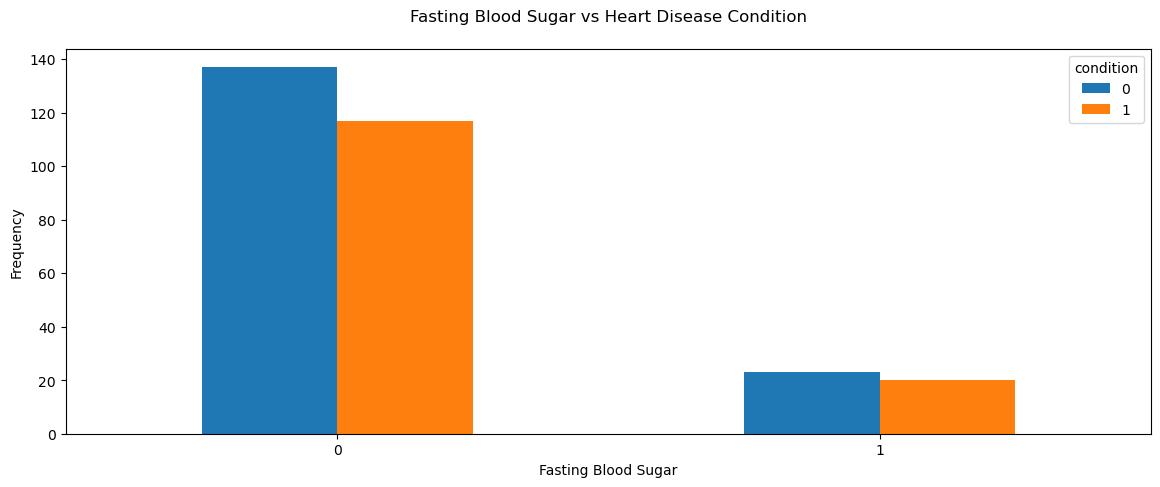

In [163]:
heart.groupby('fbs')['condition'].value_counts().unstack().plot(kind='bar',figsize=(14, 5))
plt.xlabel('Fasting Blood Sugar')
x = plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title('Fasting Blood Sugar vs Heart Disease Condition',y=1.05)


<h3 style="color:#7196E5">6. Correlation with 'HeartDisease'</h3>

In [68]:
heart.corr(numeric_only=True)['condition'].sort_values(ascending=False)

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
exang        0.421355
cp           0.408945
slope        0.333049
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
thalach     -0.423817
Name: condition, dtype: float64

<h3 style="color:#7196E5">7.Serum Cholesterol & Resting Blood Pressure Summary</h3>

In [75]:
X=heart['chol'].describe()
Y=heart['trestbps'].describe()
c=pd.concat([X,Y],axis=1)
c.columns=['chol','trestbps']
c

,chol,trestbps
count,297.000000,297.000000
mean,247.350168,131.693603
std,51.997583,17.762806
min,126.000000,94.000000
25%,211.000000,120.000000
50%,243.000000,130.000000
75%,276.000000,140.000000
max,564.000000,200.000000


<h3 style="color:#7196E5">8.Fasting Blood Sugar & Thalassemia Summary</h3>

In [81]:
XX=heart['fbs'].describe()
YY=heart['thal'].describe()
c=pd.concat([XX,YY],axis=1)
c.columns=['fbs','thal']
c

,fbs,thal
count,297.000000,297.000000
mean,0.144781,0.835017
std,0.352474,0.956690
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,2.000000
max,1.000000,2.000000


<h3 style="color:#7196E5">9.Histogram of Age Distribution</h3>

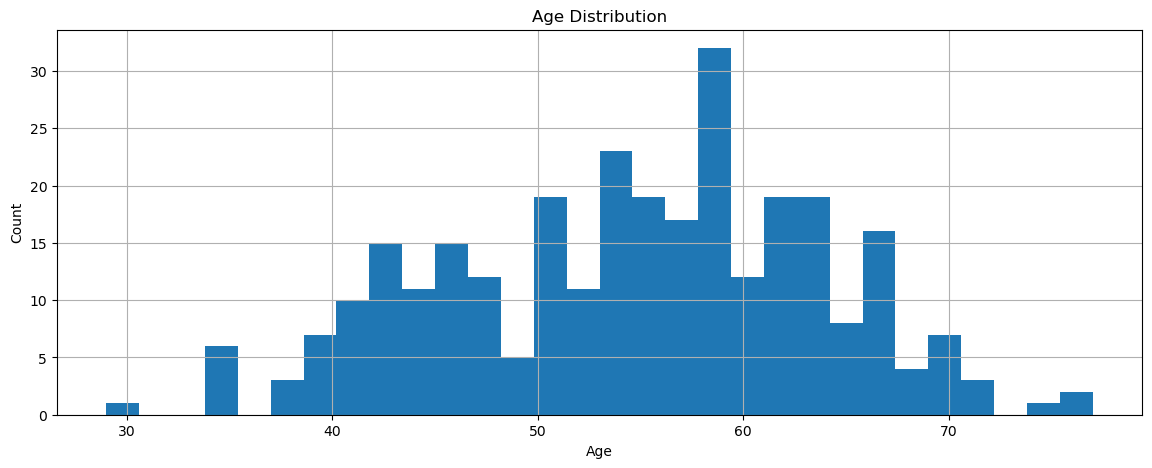

<Figure size 1400x500 with 0 Axes>

In [156]:
plt.figure(figsize=(14, 5))
heart['age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.figure(figsize=(14, 5))
plt.show()

<h3 style="color:#7196E5">10.Heart disease count by gender</h3>

Text(0.5, 1.02, 'Pairplot of Age, Cholesterol, Resting BP, and Max Heart Rate by Condition')

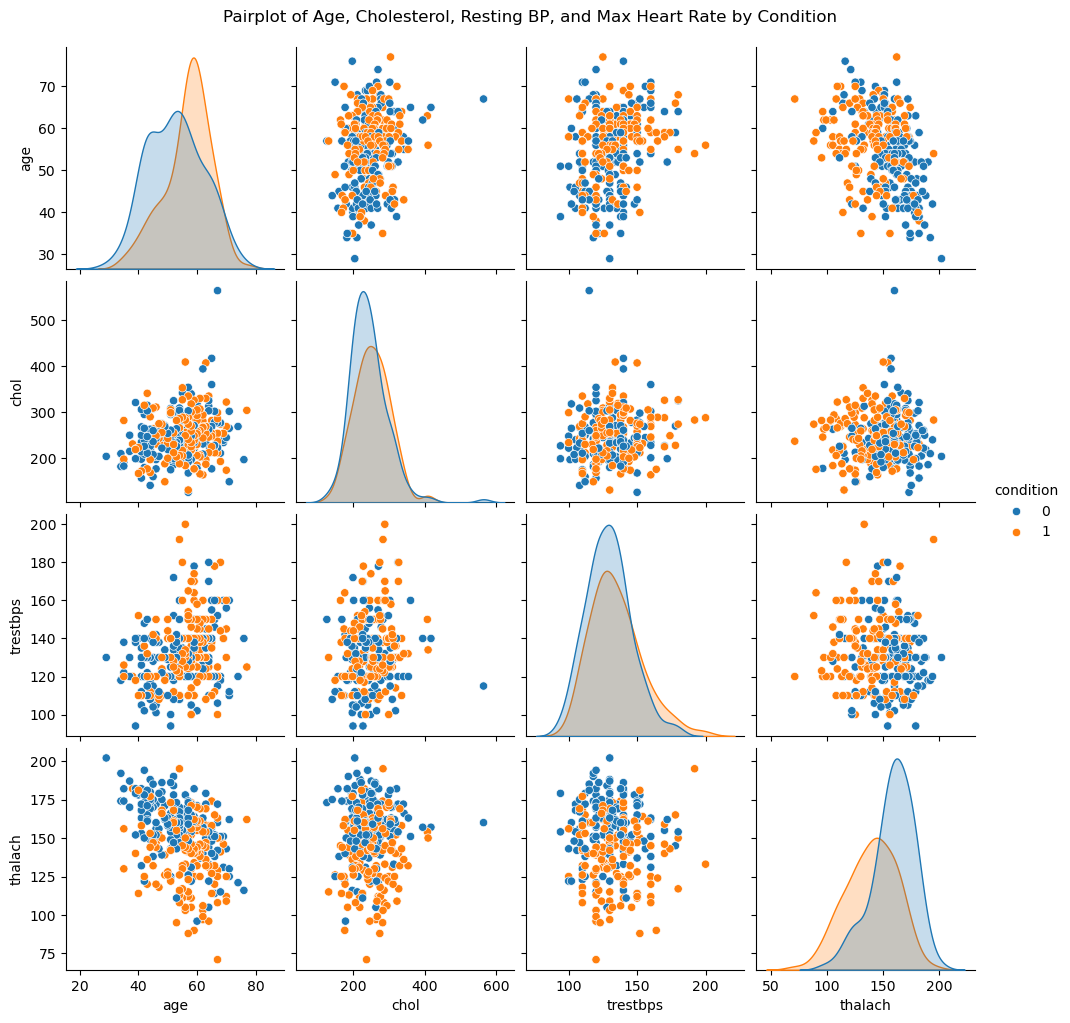

In [107]:
sns.pairplot(heart, hue='condition', vars=['age', 'chol', 'trestbps', 'thalach'], kind='scatter')
plt.suptitle("Pairplot of Age, Cholesterol, Resting BP, and Max Heart Rate by Condition", y=1.02)

<h3 style="color:#7196E5">11.Encode sex Label (Transformatin Data)</h3>

In [11]:
heart['sex'] = heart['sex'].map({0: 'Male', 1: 'Female'})


<h3 style="color:#7196E5">12.Comparison of Heart Disease Cases Across Genders & Age</h3>

C:\Users\Rammah\AppData\Local\Temp\ipykernel_20096\3084753728.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=330)


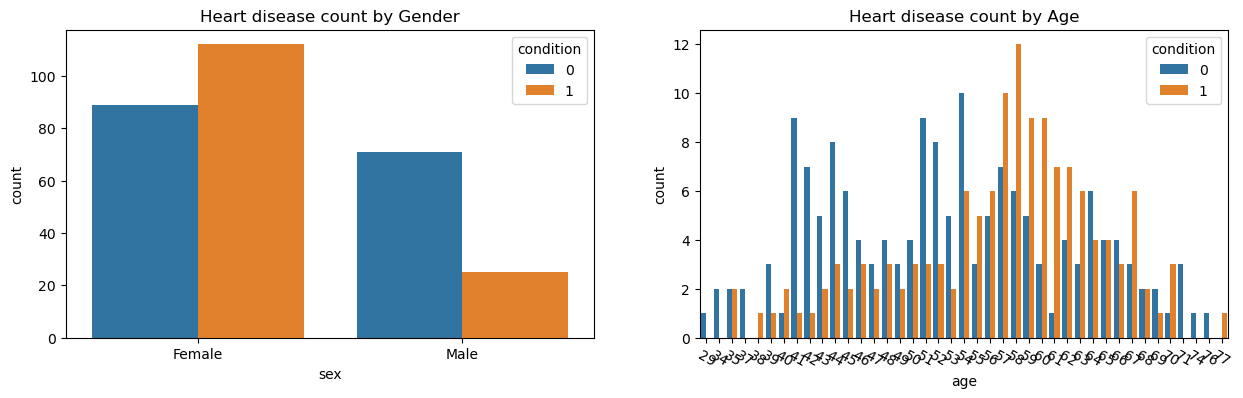

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
x=sns.countplot(data=heart, x='sex', hue='condition', ax=axes[0])
axes[0].set_title("Heart disease count by Gender")
y=sns.countplot(data=heart,x='age', hue='condition', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=330)
axes[1].set_title("Heart disease count by Age")

plt.show()

<h3 style="color:#7196E5">13.Correlation heatmap</h3>

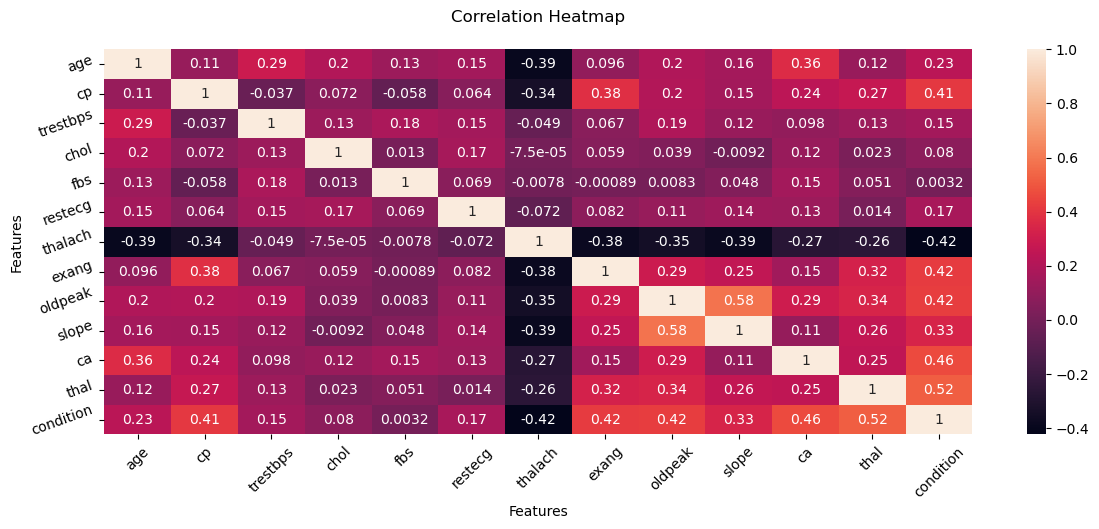

In [152]:
plt.figure(figsize=(14, 5))
sns.heatmap(heart.corr(numeric_only=True), annot=True)
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap",y=1.05)
plt.xticks(rotation=45)
plt.yticks(rotation=20)
plt.show()

<h3 style="color:#7196E5">14.Boxplot of Features(Serum Cholesterol & Maximum Heart Rate Achieved) by Species</h3>

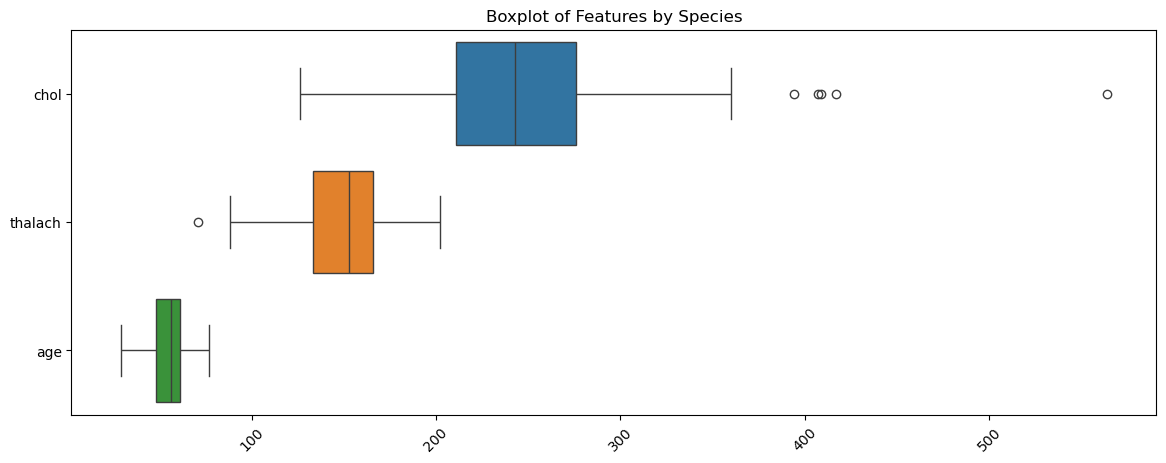

In [151]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=heart[['chol','thalach','age']], orient='h')
plt.title("Boxplot of Features by Species")
plt.xticks(rotation=45)
plt.show()